# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

ERROR: Invalid requirement: './python': Expected package name at the start of dependency specifier
    ./python
    ^
Hint: It looks like a path. File './python' does not exist.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [1]:
import mlagents
import mlagents_envs
from mlagents_envs.environment import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/root/DDPG/DDPG_MMC/robotics_reaching_executable_linux/robotics_reaching_exe_linux.x86_64', seed=1, side_channels=[])

[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# Start the environment
env.reset()

# Get behaviour names
behaviour_names = env.behavior_specs.keys()
behaviour_name = list(env.behavior_specs.keys())[0]
print(f"Behaviour name: {behaviour_name}")

# # get the default brain
# brain_name = env.brain_names[0]
# brain = env.brains[brain_name]

EPISODE START
UnityEngine.StackTraceUtility:ExtractStackTrace () (at /home/bokken/build/output/unity/unity/Runtime/Export/Scripting/StackTrace.cs:37)
UnityEngine.DebugLogHandler:LogFormat (UnityEngine.LogType,UnityEngine.Object,string,object[])
UnityEngine.Logger:Log (UnityEngine.LogType,object)
UnityEngine.Debug:Log (object)
HandAgent:OnEpisodeBegin () (at C:/Users/Amanda/Documents/MouseNet Research/robotics_reaching_2/Assets/HandAgent.cs:39)
Unity.MLAgents.Agent:_AgentReset () (at ./Library/PackageCache/com.unity.ml-agents@2.0.1/Runtime/Agent.cs:1299)
Unity.MLAgents.Academy:ForcedFullReset () (at ./Library/PackageCache/com.unity.ml-agents@2.0.1/Runtime/Academy.cs:548)
Unity.MLAgents.Academy:EnvironmentStep () (at ./Library/PackageCache/com.unity.ml-agents@2.0.1/Runtime/Academy.cs:562)
Unity.MLAgents.AcademyFixedUpdateStepper:FixedUpdate () (at ./Library/PackageCache/com.unity.ml-agents@2.0.1/Runtime/Academy.cs:43)

EPISODE START
UnityEngine.StackTraceUtility:ExtractStackTrace () (at 

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env.reset()

# Get the decsion and terminal steps
decisionSteps, terminalSteps = env.get_steps(behavior_name=behaviour_name)
print("Printing decisionSteps: ", decisionSteps)

# number of agents
num_agents = len(decisionSteps)
print(f"Number of agents: {num_agents}")

# size of each action
behaviour_spec = env.behavior_specs[behaviour_name]
action_spec = behaviour_spec.action_spec

# continuious and discrete action size
continuious_action_size = env.behavior_specs[behaviour_name].action_spec.continuous_size
discrete_actions_size = env.behavior_specs[behaviour_name].action_spec.discrete_size
print(f"Continuous action size: {continuious_action_size}")
print(f"Discrete action size: {discrete_actions_size}")

#examine the state space
states = decisionSteps.obs[0]
state_size = states.shape[1] if states.ndim > 1 else states.shape[0]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

EPISODE START
UnityEngine.StackTraceUtility:ExtractStackTrace () (at /home/bokken/build/output/unity/unity/Runtime/Export/Scripting/StackTrace.cs:37)
UnityEngine.DebugLogHandler:LogFormat (UnityEngine.LogType,UnityEngine.Object,string,object[])
UnityEngine.Logger:Log (UnityEngine.LogType,object)
UnityEngine.Debug:Log (object)
HandAgent:OnEpisodeBegin () (at C:/Users/Amanda/Documents/MouseNet Research/robotics_reaching_2/Assets/HandAgent.cs:39)
Unity.MLAgents.Agent:_AgentReset () (at ./Library/PackageCache/com.unity.ml-agents@2.0.1/Runtime/Agent.cs:1299)
Unity.MLAgents.Academy:ForcedFullReset () (at ./Library/PackageCache/com.unity.ml-agents@2.0.1/Runtime/Academy.cs:548)
Unity.MLAgents.Academy:OnResetCommand () (at ./Library/PackageCache/com.unity.ml-agents@2.0.1/Runtime/Academy.cs:504)
Unity.MLAgents.RpcCommunicator:SendCommandEvent (Unity.MLAgents.CommunicatorObjects.CommandProto) (at ./Library/PackageCache/com.unity.ml-agents@2.0.1/Runtime/Communicator/RpcCommunicator.cs:298)
Unity.M

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [4]:
from mlagents_envs.environment import UnityEnvironment
from mlagents_envs.base_env import ActionTuple

env.reset()                                                                    # reset the environment 
stateVector = decisionSteps.obs[0]                                             # get the current state (for each agent)
scores = np.zeros(num_agents)                                                  # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, continuious_action_size)             # select an action (for each agent)
    actions = np.clip(actions, -1, 1) 
    action_tuple = ActionTuple(continuous=actions)                                      # all actions between -1 and 1
    env.set_actions(behavior_name=behaviour_name, action=actions)               # send all actions to tne environment
    env.step()                                                                 # step the environment to get the next states
    decisionSteps, terminalSteps = env.get_steps(behavior_name=behaviour_name)  # get next state (for each agent)
    next_states = decisionSteps.obs[0]                                         # get next state (for each agent)
    rewards = decisionSteps.reward                                             # get reward (for each agent)
    dones = [agent_id in terminalSteps for agent_id in decisionSteps.agent_id] # see if episode finished
    scores += rewards                                                          # update the score (for each agent)
    stateVector = next_states                                                  # roll over states to next time step
    if np.any(dones):                                                          # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

EPISODE START
UnityEngine.StackTraceUtility:ExtractStackTrace () (at /home/bokken/build/output/unity/unity/Runtime/Export/Scripting/StackTrace.cs:37)
UnityEngine.DebugLogHandler:LogFormat (UnityEngine.LogType,UnityEngine.Object,string,object[])
UnityEngine.Logger:Log (UnityEngine.LogType,object)
UnityEngine.Debug:Log (object)
HandAgent:OnEpisodeBegin () (at C:/Users/Amanda/Documents/MouseNet Research/robotics_reaching_2/Assets/HandAgent.cs:39)
Unity.MLAgents.Agent:_AgentReset () (at ./Library/PackageCache/com.unity.ml-agents@2.0.1/Runtime/Agent.cs:1299)
Unity.MLAgents.Academy:ForcedFullReset () (at ./Library/PackageCache/com.unity.ml-agents@2.0.1/Runtime/Academy.cs:548)
Unity.MLAgents.Academy:OnResetCommand () (at ./Library/PackageCache/com.unity.ml-agents@2.0.1/Runtime/Academy.cs:504)
Unity.MLAgents.RpcCommunicator:SendCommandEvent (Unity.MLAgents.CommunicatorObjects.CommandProto) (at ./Library/PackageCache/com.unity.ml-agents@2.0.1/Runtime/Communicator/RpcCommunicator.cs:298)
Unity.M

AttributeError: 'numpy.ndarray' object has no attribute 'continuous'

When finished, you can close the environment.

In [5]:
env.close()

Current reward: 0
UnityEngine.StackTraceUtility:ExtractStackTrace () (at /home/bokken/build/output/unity/unity/Runtime/Export/Scripting/StackTrace.cs:37)
UnityEngine.DebugLogHandler:LogFormat (UnityEngine.LogType,UnityEngine.Object,string,object[])
UnityEngine.Logger:Log (UnityEngine.LogType,object)
UnityEngine.Debug:Log (object)
HandAgent:OnActionReceived (Unity.MLAgents.Actuators.ActionBuffers) (at C:/Users/Amanda/Documents/MouseNet Research/robotics_reaching_2/Assets/HandAgent.cs:98)
Unity.MLAgents.Actuators.VectorActuator:OnActionReceived (Unity.MLAgents.Actuators.ActionBuffers) (at ./Library/PackageCache/com.unity.ml-agents@2.0.1/Runtime/Actuators/VectorActuator.cs:76)
Unity.MLAgents.Actuators.ActuatorManager:ExecuteActions () (at ./Library/PackageCache/com.unity.ml-agents@2.0.1/Runtime/Actuators/ActuatorManager.cs:295)
Unity.MLAgents.Agent:AgentStep () (at ./Library/PackageCache/com.unity.ml-agents@2.0.1/Runtime/Agent.cs:1344)
Unity.MLAgents.Academy:EnvironmentStep () (at ./Libra

debugger-agent: Unable to listen on 6


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

### 5. DDPG Algorithm training session

In [28]:
from mlagents_envs.environment import UnityEnvironment
from mlagents_envs.base_env import ActionTuple
import numpy as np
from ddpg_agent import Agent 
from collections import deque
import torch
import torch.nn.functional as F
import time
from workspace_utils import active_session
import os

# env_name = "/root/DDPG/DDPG_MMC/robotics_reaching_executable_linux/robotics_reaching_exe_linux.x86_64" # Path to robotics reaching exe
env_name = "/root/DDPG/DDPG_MMC/robotics_reaching_executable_linux_no_log/robotics_reaching_exe_linux.x86_64" # Path to robotics reaching exe wihtout script debugging

# Ensure the executable has the necessary permissions 
os.chmod(env_name, 0o755)

try: 
    # Launch unity environment
    env = UnityEnvironment(file_name=env_name,seed=1, side_channels=[], worker_id=1)

    # Start the environment 
    env.reset()

    # Get behaviour names 
    behaviour_names = env.behavior_specs.keys()

    # Check that behaviour names have been retrieved from the environment
    if not behaviour_names:
        print("No behaviours found. Ensure that the unity environment has agents with behaviours")
    else:
        behaviour_name = list(env.behavior_specs.keys())[0]
        print(f"Behaviour name: {behaviour_name}")

        # Get what actions the environment expects and the required shape
        behaviour_spec = env.behavior_specs[behaviour_name]
        print(f"Behaviour specifications: {behaviour_spec.action_spec}")

        # Get the number of agents 
        decisionSteps, terminalSteps = env.get_steps(behavior_name=behaviour_name)
        num_agents = len(decisionSteps) + len(terminalSteps)
        print(f"Number of agents: {num_agents}")

except Exception as e:
    print(f"Error initializing environment: {e}")
    behavior_name = None


agent = Agent(state_size=52, action_size=4, random_seed=2) # Altered from origional to fit new environment

def ddpg(n_episodes=200, max_t=1000):
    
    print("Enter ddpg...\n")
    scores_deque = deque(maxlen=100)
    scores = []
    actions = []
    best_score = 0
    best_average_score = 0
    # try:
    for i_episode in range(1, n_episodes+1):

        print(f"Episode number: {i_episode}")
        avg_score = 0

        # reset the environment
        env.reset()

        #get the decision and terminal steps
        decisionSteps, terminalSteps = env.get_steps(behavior_name=behaviour_name)
        print("Printing decisionSteps: " )
        print(decisionSteps)
        print(type(decisionSteps))

        # get number of agents
        num_agents = len(decisionSteps)
        print(f"Number of agents: {num_agents}")

        # get number of continuous actions
        num_continuous_actions = env.behavior_specs[behaviour_name].action_spec.continuous_size

        # create 2D numpy array of continuous actions 
        continuous_actions = np.random.rand(num_agents, num_continuous_actions).astype(np.float32)

        # create actiontuple
        action_tuple = ActionTuple(continuous=continuous_actions)

        # get the states vector
        stateVector = decisionSteps.obs[0]

        #init score agents
        scores_agents = np.zeros(num_agents)
        print("scores_agents type: ", type(scores_agents))
        print("scores_agents shape: ", scores_agents.shape)

        score = 0
        agent.reset()

        for t in range(max_t):

            try:
                # Checkpoint to ensure it's not getting stuck
                if t % 100 == 0: 
                    print(f"Progressing at step {t}")
            except Exception as e:
                print(f"An error occurred: {e}")
                break

            # set the actions for the behaviour and step the environment
            env.set_actions(behavior_name=behaviour_name, action=action_tuple)

            # Step the environment to get the next states 
            env.step()

            # get the next states
            decisionSteps, terminalSteps = env.get_steps(behavior_name=behaviour_name)
            print(f"Step {t}, Decision steps: {len(decisionSteps)}, Terminal steps: {len(terminalSteps)}")

            # Check if all agents are in terminal state
            if len(decisionSteps)==0 and len(terminalSteps)>0:
                print(f"All agents are in terminal states at step {t}. Ending episode early.")
                break

            # extract the next states vector from the decision steps 
            next_state_vector = decisionSteps.obs[0]
            print("Next state vector: ", next_state_vector)

            # get the rewards
            rewards = decisionSteps.reward
            print("rewards type: ", type(rewards))
            print("rewards shape: ", rewards.shape)
            print("rewards: ", rewards)

            episode_finished = np.array([len(terminalSteps) > 0] * num_agents) # episode_fiished values must be passed into agent.step function as an array
            print("Episode finished: ", episode_finished)

            # see if episode has finished
            if next_state_vector is not None: 
                agent.step(stateVector, actions, rewards, next_state_vector, episode_finished)
                stateVector = next_state_vector
            #Check if scores-agents and rewards are compatible for addition
            scores_agents = np.add(scores_agents, rewards)
            # scores_agents += rewards
            if np.any(episode_finished):
                break

        # mean score of 20 agents in this episode
        score = np.mean(scores_agents)
        scores_deque.append(score)
        avg_score = np.mean(scores_deque)
        scores.append(score)

        #refresh the best agent score
        if score > best_score:
            best_score = score

        #refresh the best average score    
        if avg_score > best_average_score:
            best_average_score = avg_score
        
        #print current episode
        print("Episode:{}, Score:{:.2f}, Best Score:{:.2f}, Average Score:{:.2f}, Best Avg Score:{:.2f}".format(
            i_episode, score, best_score, avg_score, best_average_score))
        if (avg_score >= 32):
            torch.save(agent.actor_local.state_dict(), 'actor_solved.pth')
            torch.save(agent.critic_local.state_dict(), 'critic_solved.pth')
            break
    # finally:
        # Save the solved paths 
    torch.save(agent.actor_local.state_dict(), 'actor_solved.pth')
    torch.save(agent.critic_local.state_dict(), 'critic_solved.pth')
        # env.close() # Ensure env.close() is alwyas called    
    return scores

start = time.time()
with active_session():
    scores = ddpg()
end = time.time()
print('\nTotal training time = {:.1f} min'.format((end-start)/60))

Error initializing environment: Couldn't start socket communication because worker number 1 is still in use. You may need to manually close a previously opened environment or use a different worker number.
Enter ddpg...

Episode number: 1
Printing decisionSteps: 
<class 'mlagents_envs.base_env.DecisionSteps'>
Number of agents: 20
scores_agents type:  <class 'numpy.ndarray'>
scores_agents shape:  (20,)
Progressing at step 0
Forearm
Hand Exit
Upperarm
Hand Exit
Upperarm
Step 0, Decision steps: 20, Terminal steps: 0
Next state vector:  [[-3.6089134e-01  1.0000000e+00  1.8774700e+00 ...  6.6673668e+01
   8.2359192e+01  2.3093668e+01]
 [-3.6064243e-01  1.0000000e+00  1.8775358e+00 ... -5.4268238e+01
  -5.8678510e+02  3.8146755e+01]
 [-3.6005592e-01  1.0000000e+00  1.8776621e+00 ... -3.7365669e-01
  -1.8225275e+01 -1.8846086e+02]
 ...
 [-3.6032104e-01  1.0000000e+00  1.8775902e+00 ... -1.5628018e+03
  -1.2455449e+03  1.8728696e+03]
 [-3.6091042e-01  1.0000000e+00  1.8774643e+00 ...  2.000430

### 6. Plot of the training Result

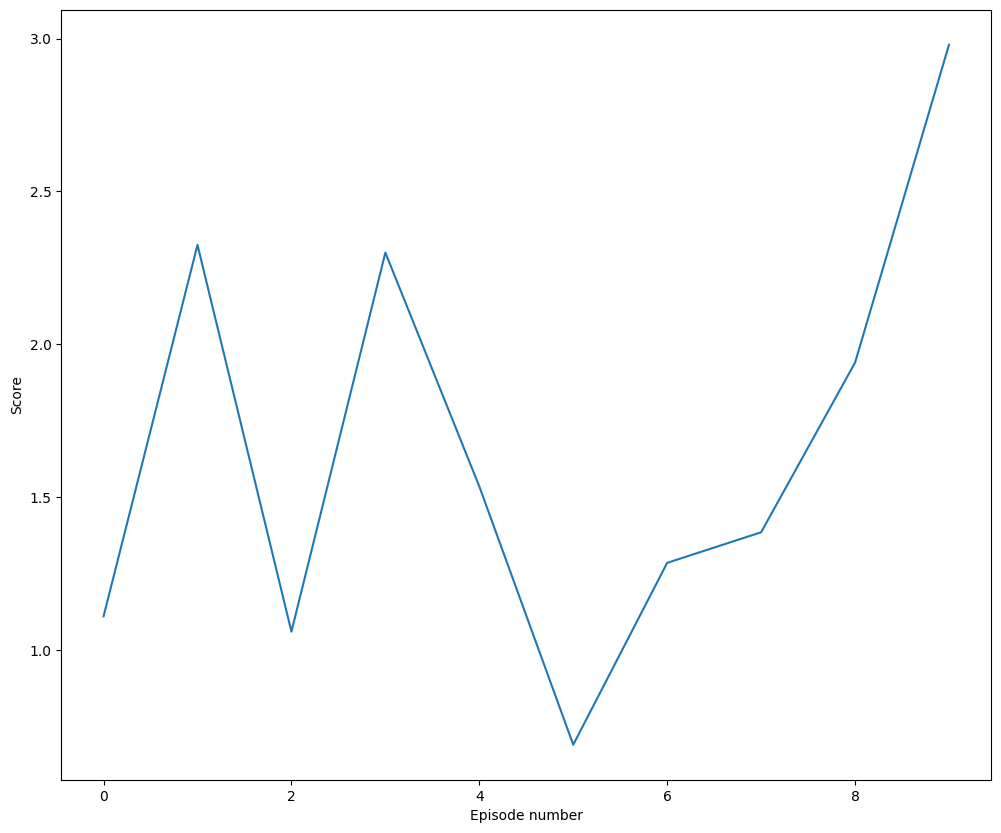

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.xlabel('Episode number')
plt.ylabel('Score')
plt.show()

### Testing using the trained agent

In [31]:
from ddpg_agent import Agent
from collections import deque
import torch
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import os
from mlagents_envs.environment import UnityEnvironment
from mlagents_envs.base_env import ActionTuple

env.reset() # reset the unity environment
behaviour_name = list(env.behavior_specs.keys())[0] # get behviour name
decisionSteps, terminalSteps = env.get_steps(behavior_name=behaviour_name) #get the decision and terminal steps
stateVector = decisionSteps.obs[0] # get the current state for each agent
agent = Agent(state_size=52, action_size=4, random_seed=2)
num_agents = len(decisionSteps) + len(terminalSteps)# get the number of agents
scores = np.zeros(num_agents) # initialize the score for each agent 
agent.actor_local.load_state_dict(torch.load('actor_solved.pth'))
agent.critic_local.load_state_dict(torch.load('critic_solved.pth'))
agent.reset()

# Get behavior specs
behavior_specs = env.behavior_specs[behaviour_name]
action_size = behavior_specs.action_spec.continuous_size

print(f"state size: {state_size}")
print(f"action size: {action_size}")

while True:
    num_continuous_actions = env.behavior_specs[behaviour_name].action_spec.continuous_size # get number of continuous actions
    continuous_actions = np.random.rand(num_agents, num_continuous_actions).astype(np.float32) # select actions 
    action_tuple = ActionTuple(continuous=continuous_actions) # create action tuple for continuous actions 
    env.set_actions(behavior_name=behaviour_name, action=action_tuple) #send the actions to the environemnt
    env.step() # step the environment

    decisionSteps, terminalSteps = env.get_steps(behavior_name=behaviour_name)
    next_state_vector = decisionSteps.obs[0] # get next state vector

    rewards = decisionSteps.reward # get rewards 

    episode_finished = np.array([len(terminalSteps) > 0] * num_agents) # episode_fiished values must be passed into agent.step function as an array
    if rewards.shape[0] == num_agents: 
        scores = np.add(scores, rewards) # update the score
    if next_state_vector is not None: # roll over states to next timestep 
        print(next_state_vector.shape)
        agent.step(stateVector, actions, rewards, next_state_vector, episode_finished)
        stateVector = next_state_vector
    if np.any(episode_finished): # Exit loop if episode finshed 
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

state size: 52
action size: 4
(20, 52)
Forearm
(20, 52)
Hand Exit
HandAgent
Hand Collided with CUBE
Forearm
Forearm
Hand Exit
Forearm
Forearm
Hand Exit
Hand Exit
Forearm
Hand Exit
Forearm
Hand Exit
(20, 52)
Hand Exit
Hand Exit
(20, 52)
Forearm
Hand Exit
(20, 52)
Upperarm
Hand Exit
(20, 52)
(20, 52)
(20, 52)
Forearm
(20, 52)
Hand Exit
(20, 52)
(20, 52)
HandAgent
Hand Collided with CUBE
(20, 52)
Hand Exit
HandAgent
Hand Collided with CUBE
Forearm
Forearm
Hand Exit
(20, 52)
Forearm
ElbowBend
Hand Exit
Hand Exit
Forearm
Hand Exit
Upperarm
Hand Exit
Hand Exit
Hand Exit
(20, 52)
Forearm
Forearm
Hand Exit
Hand Exit
(20, 52)
(20, 52)
Upperarm
Hand Exit
Forearm
(20, 52)
Forearm
Hand Exit
Hand Exit
(20, 52)
(20, 52)
(20, 52)
(20, 52)
HandAgent
Hand Collided with CUBE
Hand Exit
Forearm
Hand Exit
(20, 52)
Forearm
Hand Exit
(20, 52)
Forearm
Hand Exit
Forearm
Hand Exit
Forearm
Hand Exit
(20, 52)
Forearm
Hand Exit
HandAgent
Hand Collided with CUBE
Hand Exit
(20, 52)
Forearm
Hand Exit
(20, 52)
ElbowBe

/usr/local/lib/python3.9/site-packages/torch/nn/functional.py:1933: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


(20, 52)
Upperarm
Forearm
Hand Exit
Hand Exit
Forearm
Hand Exit
(20, 52)
(20, 52)
(20, 52)
HandAgent
Hand Collided with CUBE
Hand Exit
Forearm
(20, 52)
(20, 52)
Hand Exit
(20, 52)
(20, 52)
ElbowBend
Hand Exit
(20, 52)
Upperarm
Hand Exit
(20, 52)
HandAgent
Hand Collided with CUBE
Forearm
Forearm
Hand Exit
Hand Exit
Hand Exit
Forearm
(20, 52)
Forearm
Hand Exit
(20, 52)
Hand Exit
Forearm
Hand Exit
Forearm
Hand Exit
(20, 52)
ElbowBend
Hand Exit
(20, 52)
Forearm
(20, 52)
Hand Exit
(20, 52)
Upperarm
Hand Exit
(20, 52)
(20, 52)
HandAgent
Hand Collided with CUBE
Hand Exit
ElbowBend
Hand Exit
Upperarm
(20, 52)
Hand Exit
(20, 52)
Forearm
Hand Exit
Forearm
Hand Exit
Forearm
Hand Exit
(20, 52)
Forearm
Hand Exit
(20, 52)
Upperarm
Hand Exit
(20, 52)
(20, 52)
Forearm
(20, 52)
Hand Exit
(20, 52)
Upperarm
Hand Exit
Upperarm
Hand Exit
HandAgent
Hand Collided with CUBE
Hand Exit
(20, 52)
Upperarm
Hand Exit
(20, 52)
(20, 52)
HandAgent
Hand Collided with CUBE
HandAgent
Hand Collided with CUBE
Forearm
Forea

In [19]:
env.close()

Forearm
Hand Exit
Forearm
Memory Statistics:
[ALLOC_TEMP_TLS] TLS Allocator
  StackAllocators : 
    [ALLOC_TEMP_MAIN]
      Peak usage frame count: [4.0 KB-8.0 KB]: 1422249 frames, [2.0 MB-4.0 MB]: 1 frames
      Initial Block Size 4.0 MB
      Current Block Size 4.0 MB
      Peak Allocated Bytes 2.1 MB
      Overflow Count 0
    [ALLOC_TEMP_Loading.AsyncRead]
      Initial Block Size 64.0 KB
      Current Block Size 64.0 KB
      Peak Allocated Bytes 128 B
      Overflow Count 0
    [ALLOC_TEMP_Loading.PreloadManager]
      Initial Block Size 256.0 KB
      Current Block Size 256.0 KB
      Peak Allocated Bytes 134.6 KB
      Overflow Count 4
    [ALLOC_TEMP_Background Job.Worker 8]
      Initial Block Size 32.0 KB
      Current Block Size 32.0 KB
      Peak Allocated Bytes 0 B
      Overflow Count 0
    [ALLOC_TEMP_Job.Worker 6]
      Initial Block Size 256.0 KB
      Current Block Size 256.0 KB
      Peak Allocated Bytes 0 B
      Overflow Count 0
    [ALLOC_TEMP_Job.Worker 0]
    